# Quantum Machine Learning
## Day 3: Implementation the Quantum Fourier Transform (QFT)

### Group Member:

- Philipp Fukas
- Christopher Gundler
- Farina Kock
- Jonas Rebstadt
- Christoph Stenkamp

The Fourier Transform is a tool that decomposes a waveform (a function or signal) into an alternate representation, characterized by sine and cosines. The Fourier Transform shows that any waveform can be re-written as the sum of sinusoidal functions.

The Quantum Fourier Transform is the quantum analogue of the classical Fourier Transform. It is a part of many quantum algorithms, e. g. Shor's algorithm for factoring or the quantum phase estimation algorithm for estimating the eigenvalues of a unitary operator.

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute
from math import pi
import matplotlib.pyplot as plt
from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')

An implementation of the QFT in a circuit is provided in the following cell. In the circuit only the Hadamard gates and the controlled phase gates are used.

In [2]:
# Create a Quantum Register with 6 qubits
qr = QuantumRegister(6)

# Create a Classical Register with 6 bits
cr = ClassicalRegister(6)

# Create a Quantum Circuit acting on the qr and cr register
circuit = QuantumCircuit(qr, cr)

for i in range(len(qr)):
    for j in range(i):
        circuit.cu1(pi/float(2**(i-j)),qr[i], qr[j])
    circuit.h(qr[i])


# measure gate from qr to cr
circuit.measure(qr, cr)

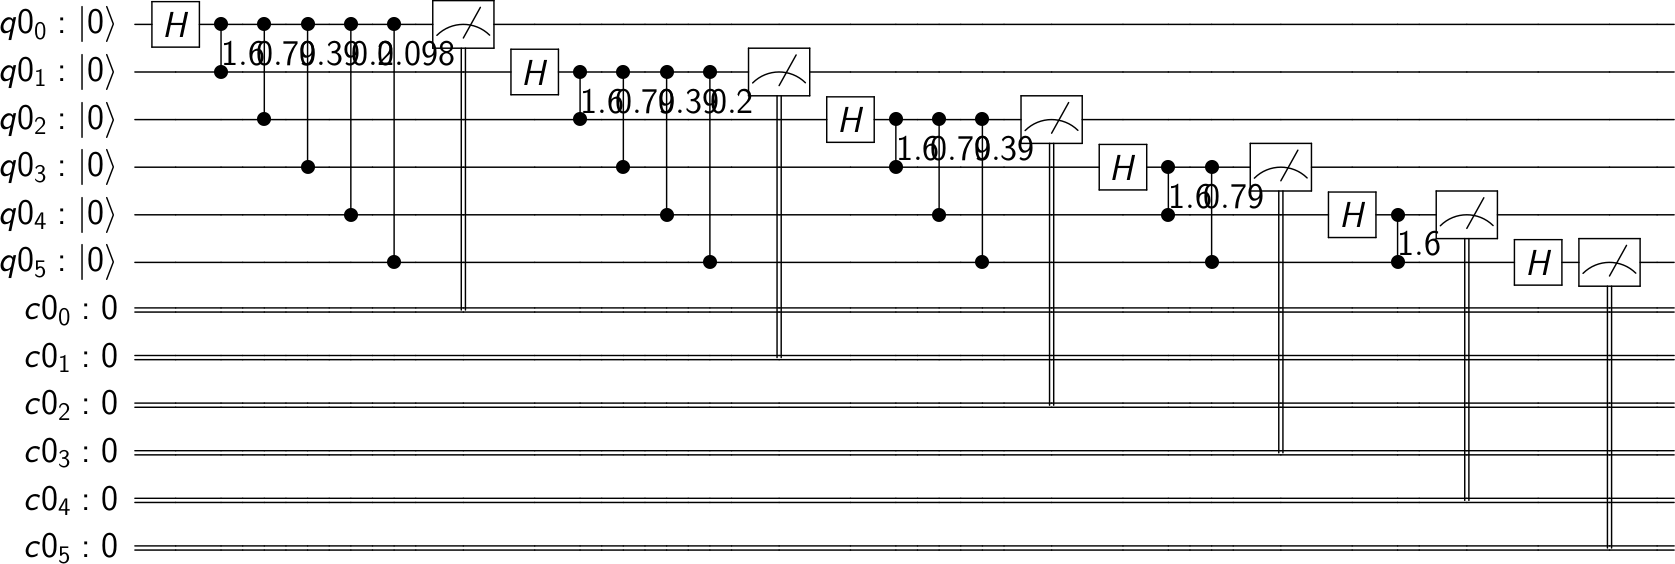

In [3]:
circuit_drawer(circuit)

## Run multiple trials:

We let the QFT-Algorithm run for 30000 trials and plottet the resulting distribution. We can see, that the singe results are nearly equally distributed.

In [4]:
# Create a Quantum Program for execution 
number_of_trials = 30000
job = execute(circuit, backend, shots=number_of_trials)

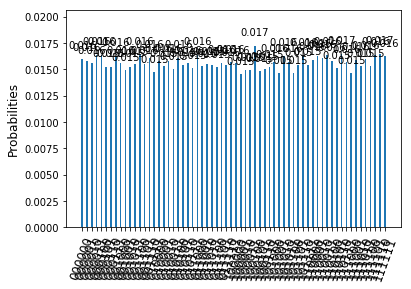

In [5]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

## Run multiple trials with different initialisations:
To test, whether the initialisation of single Qubits affect the resulting distribution, we initialised the Qubits in all possible combinations and ran the QFT-Algorithm for multiple trials. The initialisation can be realized by applying a x-gate as the first gate on a single Qubit. This swaps the the state of the Qubit from zero to one, before the other gates are applied.

As we can see, the single results are a little bit different, but all of them seem roughly equally distributed. 

In [6]:
N = 6

In [7]:
def create_register_and_qft(which_to_not: int = 0):
    qr = QuantumRegister(N)
    cr = ClassicalRegister(N)
    circuit = QuantumCircuit(qr, cr)

    for pos,sign in enumerate("{0:b}".format(which_to_not).zfill(N)):
        if sign == '1':
            circuit.x(qr[pos])
            
    for i in range(len(qr)):
        for j in range(i):
            circuit.cu1(pi/float(2**(i-j)),qr[i], qr[j])
        circuit.h(qr[i])
    

    # measure gate from qr to cr
    circuit.measure(qr, cr)
    
    number_of_trials = 10000
    job = execute(circuit, backend, shots=number_of_trials)

    result = job.result()
    counts = result.get_counts(circuit)
    
    return counts

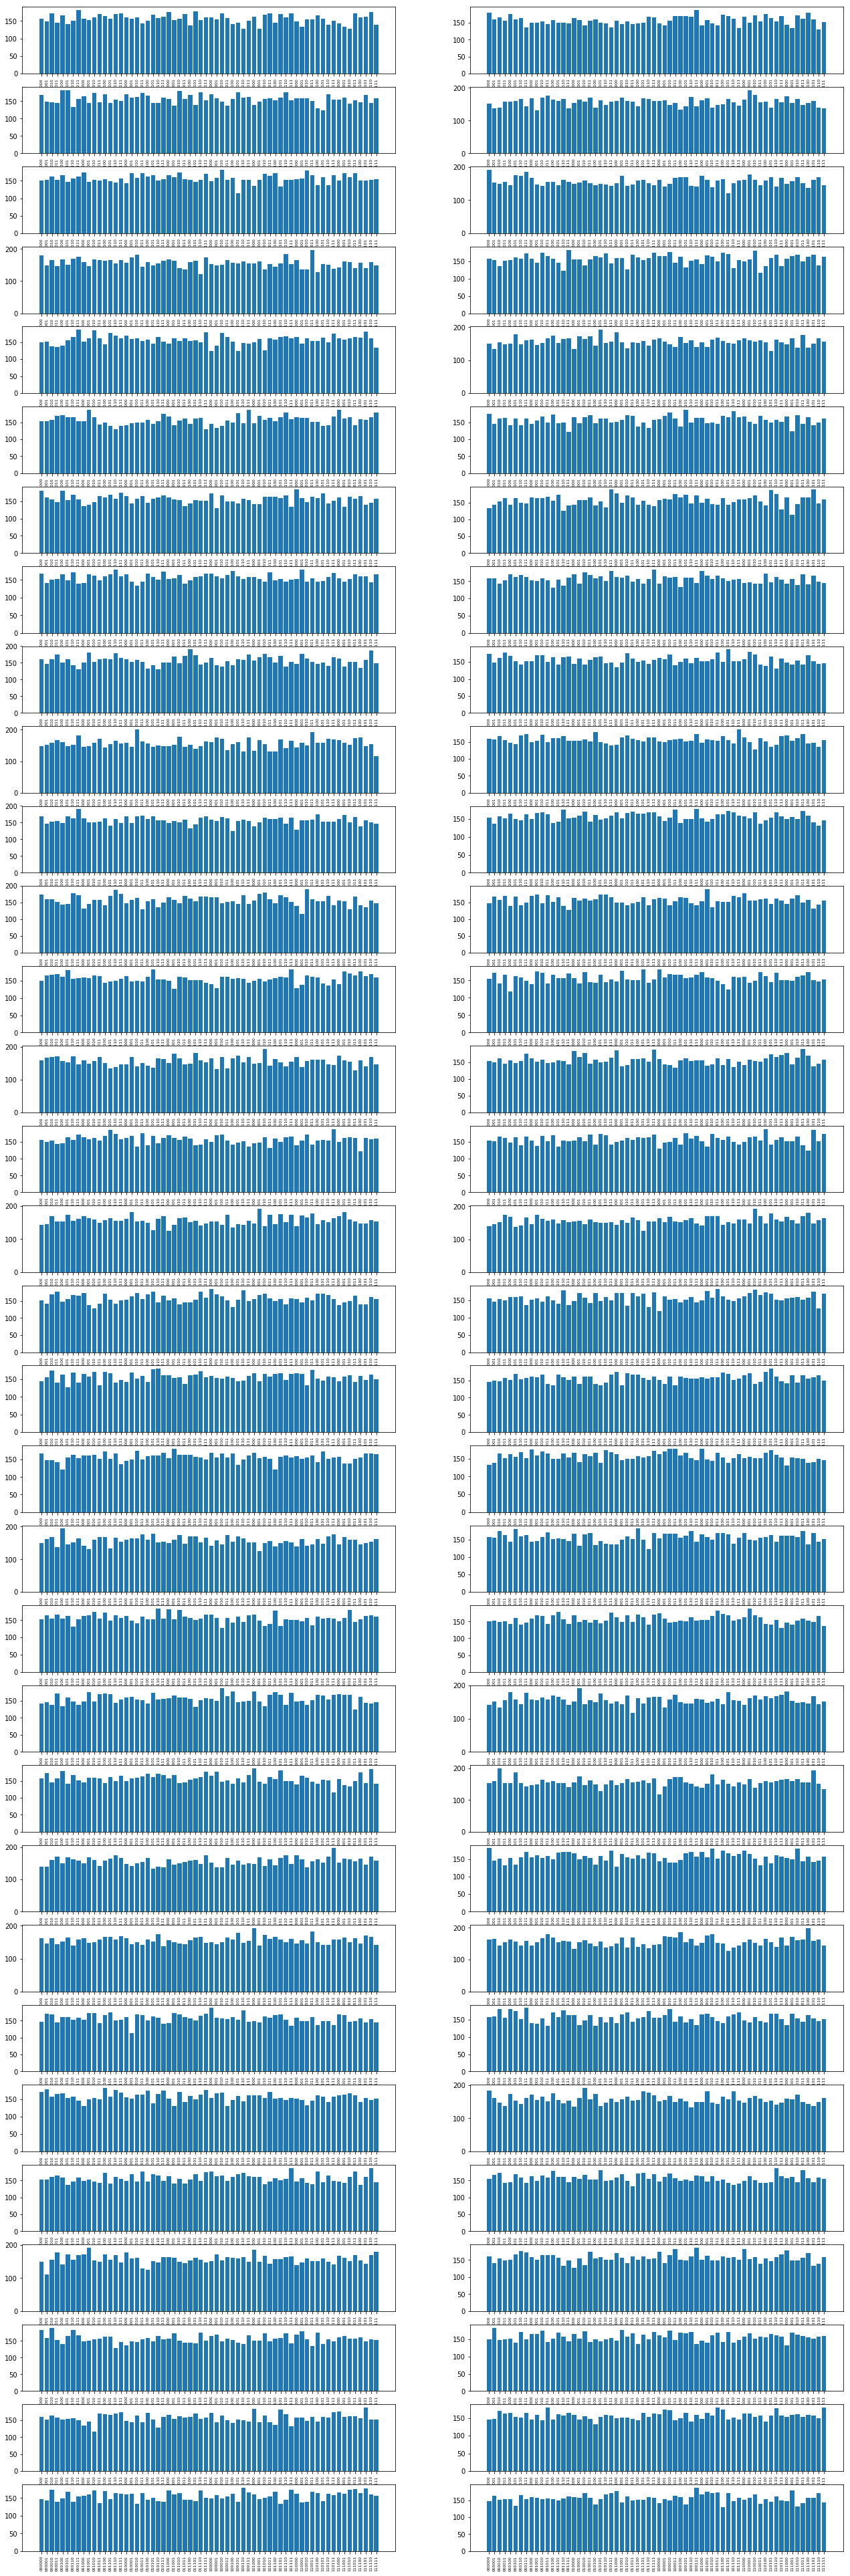

In [8]:
fig, ax = plt.subplots(32, 2, figsize=(22,70))
ax_flat = ax.flat
for index, current_ax in enumerate(ax_flat):
    counts = create_register_and_qft(index)
    current_ax.bar(*list(zip(*counts.items())))
    current_ax.set_xticklabels([i for i in counts.keys()], rotation='vertical', size=6)
plt.plot();

## Run multiple trials with entanglement:
In the next step we tested, whether entanglement has an impact on the resulting distribution. Therefore we applied a CNOT-Gate onto every Qubit.

We can see, that the singe results are again nearly equally distributed. Therefore we can conculde, that zhis simple kind of entanglement has no impact on the resulting distirbution.

In [8]:
def entangle_qft(number_of_qbits:int = 6):
    qr = QuantumRegister(number_of_qbits)
    cr = ClassicalRegister(number_of_qbits)
    circuit = QuantumCircuit(qr, cr)
            
    for i in range(len(qr)):
        for j in range(i):
            circuit.cu1(pi/float(2**(i-j)),qr[i], qr[j])
        #if i != 0:
        #    circuit.cx(qr[i],qr[i-1])
        circuit.h(qr[i])
    for i in range(len(qr)):    
        if i != 0:
            circuit.cx(qr[i],qr[i-1])
    
    # measure gate from qr to cr
    circuit.measure(qr, cr)
    
    number_of_trials = 10000
    job = execute(circuit, backend, shots=number_of_trials)

    result = job.result()
    counts = result.get_counts(circuit)
    
    return counts, circuit

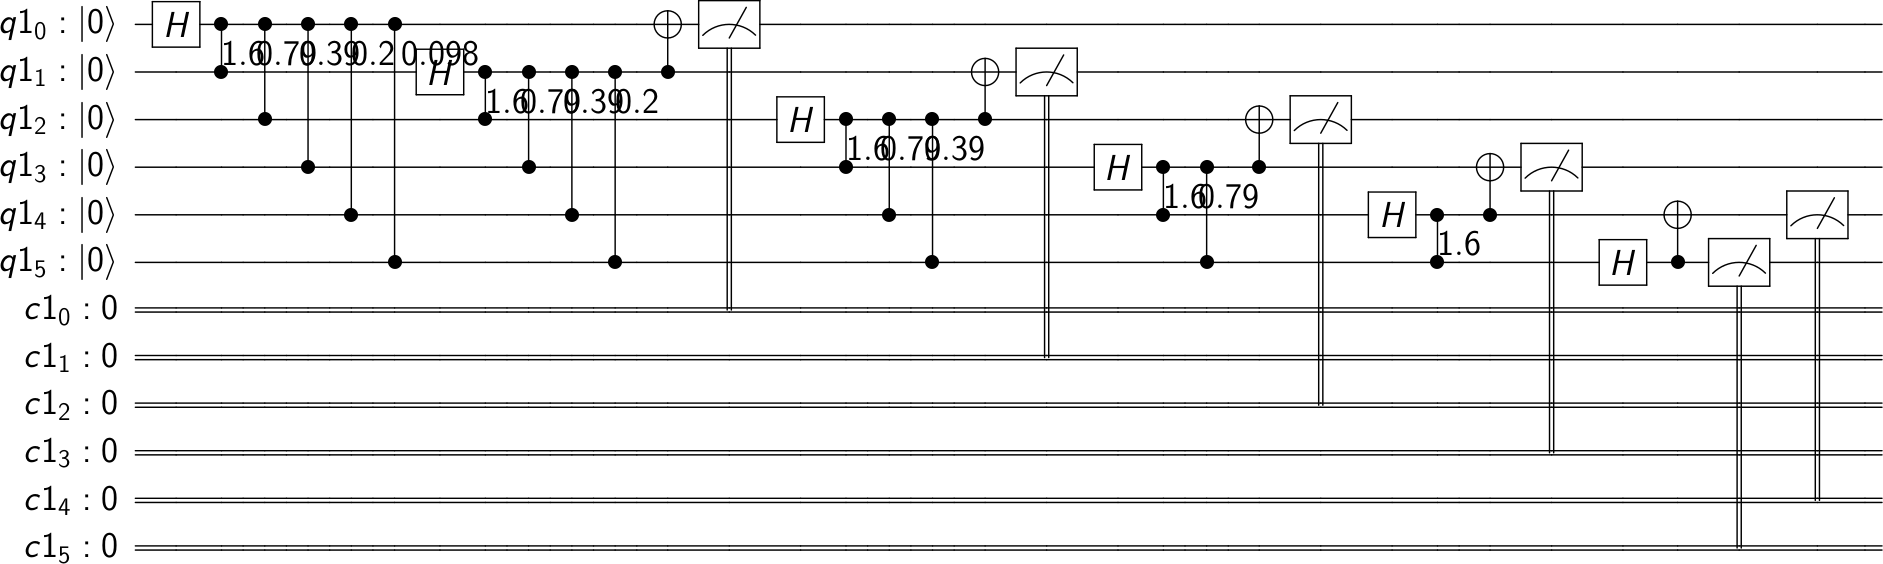

In [9]:
counts, circuit = entangle_qft()
circuit_drawer(circuit)

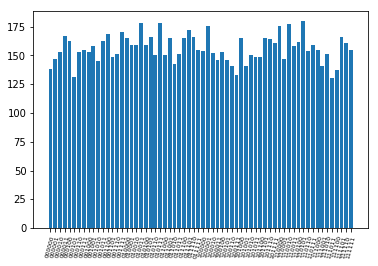

In [10]:
fig, ax = plt.subplots(1, 1)
ax.bar(*list(zip(*counts.items())))
ax.set_xticklabels([i for i in counts.keys()], rotation=75, size=6)
plt.plot();

# On a quantum computer

In [22]:
import Qconfig
use_local_simulator = True

try:
    register(Qconfig.APItoken, Qconfig.config['url'])
    print('Access to IBM Q-Aqua')
    print('- - - - - - - - - - - - - - - - - - - - - - - - -')
    print('\n')
    print("Available machines:")
    print(available_backends({'local': use_local_simulator, 'simulator': use_local_simulator}))
    backend = least_busy(available_backends({'simulator': use_local_simulator, 'local': use_local_simulator}))
    print('Using ' + backend + ' as hardware to process query.')
except:
    ('Authorization failed, aborting')

In [23]:
IBMQ.load_accounts()

ConnectionError: Couldn't connect to IBMQuantumExperience server: error during login: Wrong user or password, check your credentials.

In [13]:
from qiskit.backends.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] > 3 and
                                                       not x.configuration()['simulator'])
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

NameError: name 'IBMQ' is not defined